<a href="https://colab.research.google.com/github/Guryansh/Stock-Price-Prediction/blob/main/Stock_Prediction_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses artificial recurrent neural network called Long Short Term Memory (LSTM)
#             to predict the closing stock price of a company using the past 60 day stock price.

In [5]:
#Libraries
!pip install keras
!pip install yfinance
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
# Get the stock quote
df=yf.download('AAPL',start='2012-01-01', end='2019-12-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469282,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607712,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739513,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.143257,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.698898,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.866325,137310400


In [8]:
#Get the number of rows and columns
df.shape

(2002, 6)

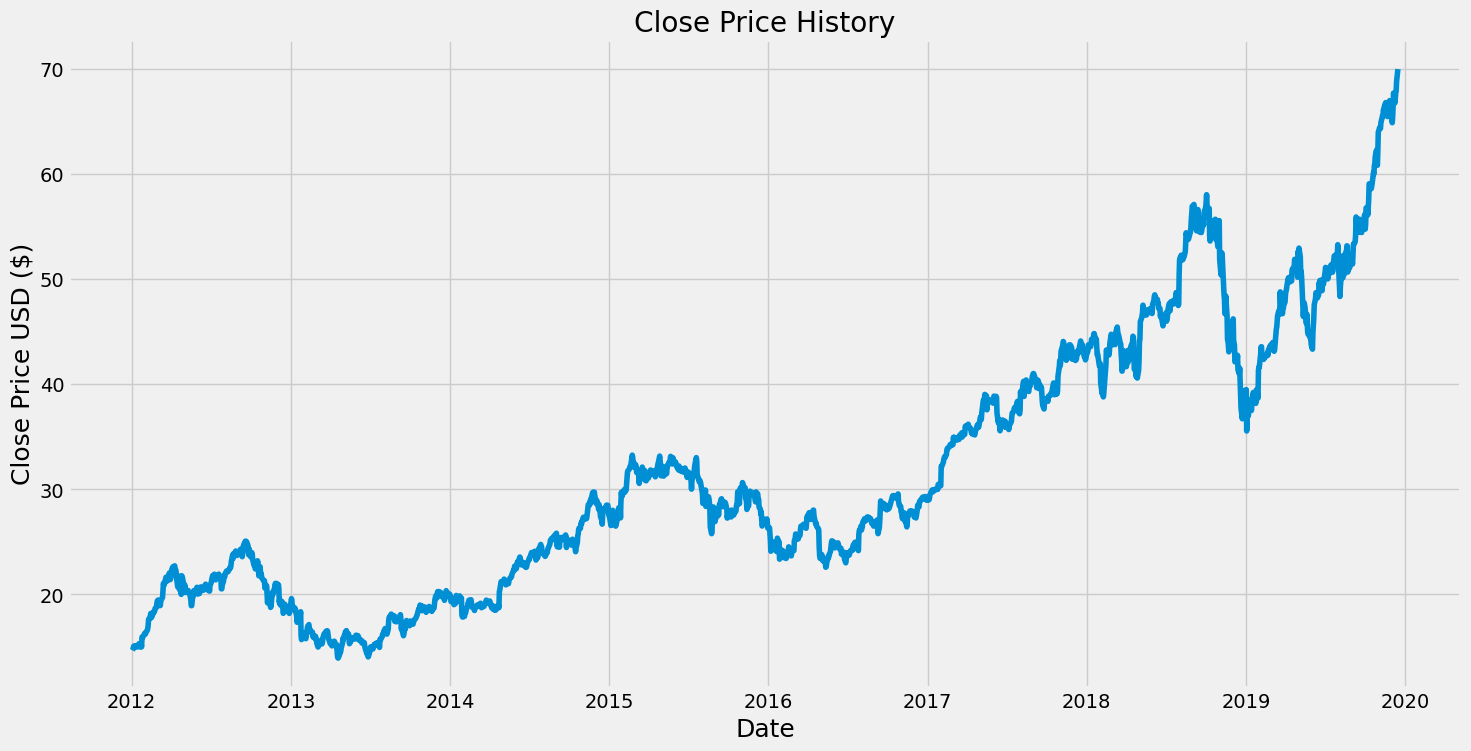

In [9]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
#Create a new dataframe with only Close column
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1602

In [11]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [12]:
#Create the training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [14]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [16]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=2)

Epoch 1/2
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - loss: 0.0013
Epoch 2/2
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 2.7695e-04


In [20]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003

test_data=scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [21]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [22]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [24]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.4339413738250733

<ipython-input-25-f430af14ec44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


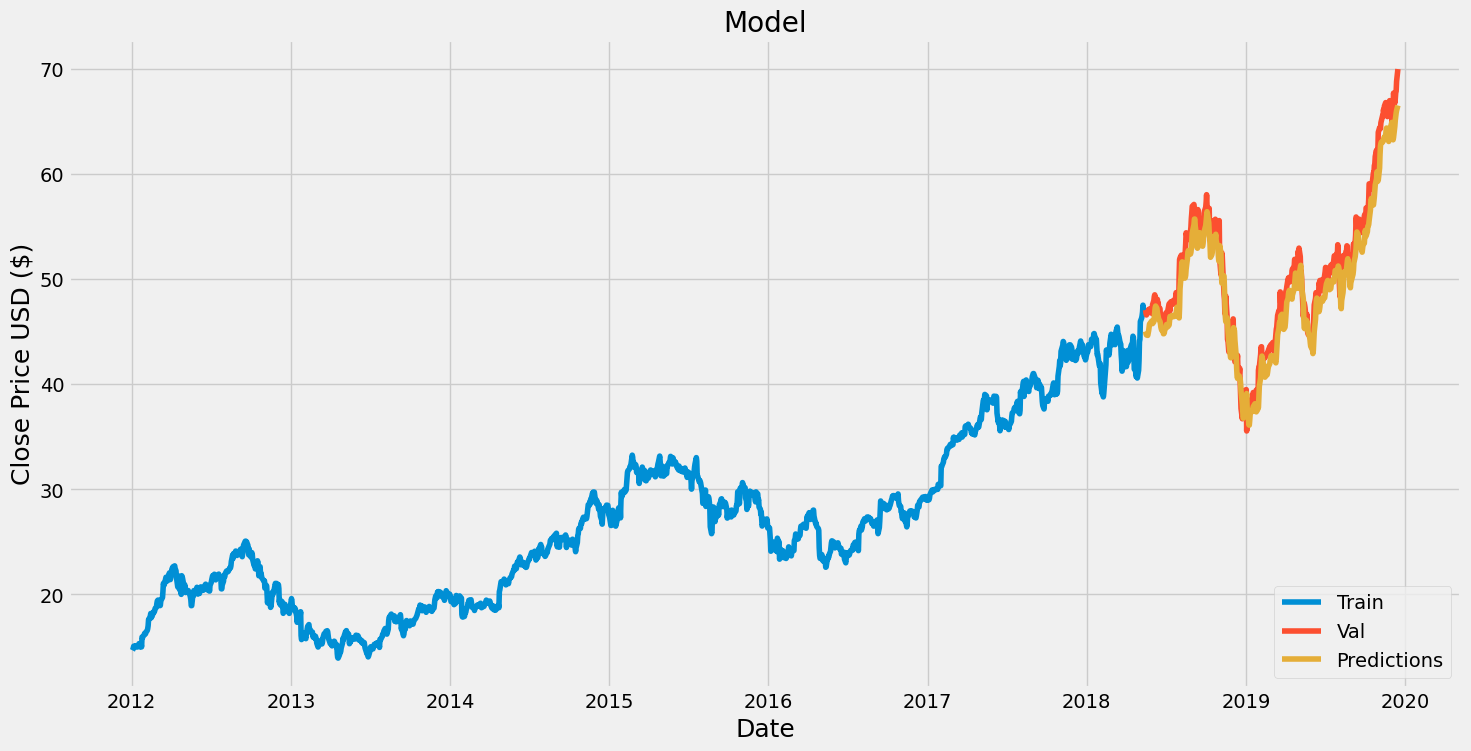

In [25]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [26]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,45.008667
2018-05-17,46.747501,44.786694
2018-05-18,46.577499,44.675198
2018-05-21,46.907501,44.636349
2018-05-22,46.790001,44.839325
...,...,...
2019-12-10,67.120003,65.089470
2019-12-11,67.692497,65.435890
2019-12-12,67.864998,65.791176


In [28]:
#Get the quote
apple_quote=yf.download('AAPL',start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the lst 60day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[67.3747]]


In [31]:
apple_quote2=yf.download('AAPL',start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-12-18    69.934998
Name: Close, dtype: float64
